# Final Test for Practical Programming PA 7081

Due January 10th 2022 at 12:00. 

## This is individual assignment. Submit your work via Blackboard as 'id.ipynb' file, where 'id' is your University user id (e.g., for me it is sn85).

# DO NOT USE any file compression method. 


While the tasks below mention magnetic fields and particle orbits, you do not need to know any physics to do this test, which only examines your Python programming skills. Problem 3 is optional and I expect it to be attempted by the strongest students only.



### Problem 1  (15 marks): Reading and plotting data from a file.


Read in the contents of the file 'rev26_27.dat' into a RecArray.  This is a data file containing a spacecraft called Cassini's magnetometer measurements from two orbits around Saturn in 2007. The columns are day-of-year since 2004, and three field components in spherical polar coordinates ($B_r$, $B_\theta$, $B_\varphi$). Make the following plot:
 
 
* Plot using red pixel points $B_r$ versus day of year since 2004.  
* Limit the time (date) axis to between 940 to 950 days, and the $y$ axis to between -3 to 4. 
* Label the axes appropriately and add a title and a legend.  
* Add a dotted green horizontal line at $B_r=0$.  
* Finally, plot a linear regression (line of best linear fit) in blue, and print the coefficients of the fit.



Print the coefficients.
-0.23103808547433766 219.10600808359837


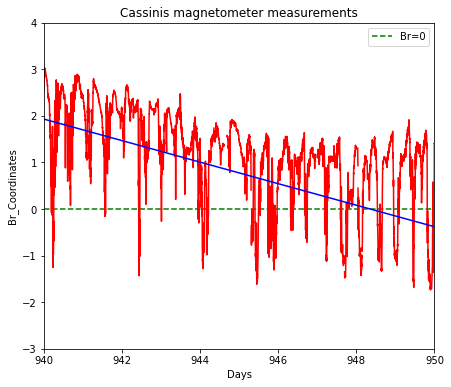

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Reading a recarry from txt

Recarry = 'rev26_27.dat'
scdat = np.recfromtxt(Recarry,names=['d','e' , 'a', 'c'])

### Plot using red pixel points  𝐵𝑟  versus day of year since 2004.
### Limit the time (date) axis to between 940 to 950 days, and the  𝑦  axis to between -3 to 4.
### Label the axes appropriately and add a title and a legend
### Add a dotted green horizontal line at  𝐵𝑟=0 .

plt.figure(figsize = (7,6))
plt.xlim([940,950])
plt.ylim([-3,4])
plt.xlabel('Days')
plt.ylabel('Br_Coordinates')
plt.title('Cassinis magnetometer measurements')
plt.axhline(0, color = 'g',ls = '--',label = "Br=0")
plt.legend()
plt.plot(scdat.d,scdat.e,color = 'r')


### Null Values been removed from the recarry 

scdat_e=scdat[np.logical_not(np.isnan(scdat.e))]
scdat_demo=scdat_e[np.logical_not(np.isnan(scdat_e.d))]

### print the coefficients of the fit.

x = scdat_demo.d
y = scdat_demo.e

k,d = np.polyfit(x,y, 1)
print ("Print the coefficients.")
print(k , d)

### Finally, plot a linear regression (line of best linear fit) in blue 

X = np.array(scdat_demo.d).reshape(-1, 1)  # values converts it into a numpy array
Y = np.array(scdat_demo.e).reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y , 1)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.plot(X, Y_pred, color='Blue')
plt.show()





### Problem 2 (25 marks): Plot a color map and a contour plot of a function, and a histogram

Here we want to define a function $z$ of $x$ and $y$ coordinates:

$$
z = \frac{\sin A x \cos(y+r)}{B + x} 
$$

where $r = \sqrt{x^2 + y^2}$, $A$ and $B$ are constants. We then plot the function with a colour map and make a histogram giving some details about the map. In particular, please do the following:

* Introduce a Python function that does the following: (1) defines Numpy arrays x and y from $a$ to $b$ with N elements each; (2) computes the values of the function $z$ as defined above; (3) accepts $N$, $a$ and $b$ as arguments and $A$ and $B$ as keywords with default values $A=1, B=0$; (4) return arrays $x$, $y$ and the 2D Numpy array $z$. 

* Produce a figure with two panels side by side horisontally. The left hand side panel should show the colour map image and a contour plot (on the same image) of function $z$ for $A=1$, $B=1$, $N=100$, $a=0$, $b=2\pi$. The right hand panel should show the histogram of the values of $z$ for all the ($N \times N$) pixels. Make sure that you plot looks professional, e.g., has labels and the title. Test that your code works for $B$ between 0 and 2. 

* Compute and print in one line the mean of the function $z(x,y)$ on the domain defined above. Use `.format` statement and the scientific notation with 4 digits after the floating point. 




In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
# function to compute r value
def r_func(x,y):
    return np.sqrt(x**2+y**2)

def z_val(N,a,b,A=1,B=0):
    r = []
    p = []
    t = []
# Defining numpy arrays r and p with N elements each
    for w in np.linspace(a,b,N):
        j = w
# numerartor computation for function t
# r_func is definded separately
        numer = np.sin(A*w)*np.cos(j + r_func(w,j))
# denominator computation for function t
        denom = B + w
# dividing / calculation t value
        output = np.divide(numer, denom)
# collecting the r1,p1,t values correspondingly
        r.append(w)
        p.append(j)
        t.append(output)
        
    m1 = [0 if math.isnan(x) else x for x in t]
    m1 = np.asarray(m1,dtype= np.float32)
    m1 = m1*m1[:,np.newaxis]

            
    return r,p,m1



# Passing Parameters "N = 100,a = 0,b = 2*np.pi,A=1,B=0"

In [4]:
x,y,z = z_val(N = 100,a = 0,b = 2*np.pi,A=1,B=0)
print("Mean of the function 𝑧(𝑥,𝑦) : {:.4e}".format(np.mean(z)))

Mean of the function 𝑧(𝑥,𝑦) : 7.9460e-05


<ipython-input-3-2a48d68c0ed5>:18: RuntimeWarning: invalid value encountered in true_divide
  output = np.divide(numer, denom)


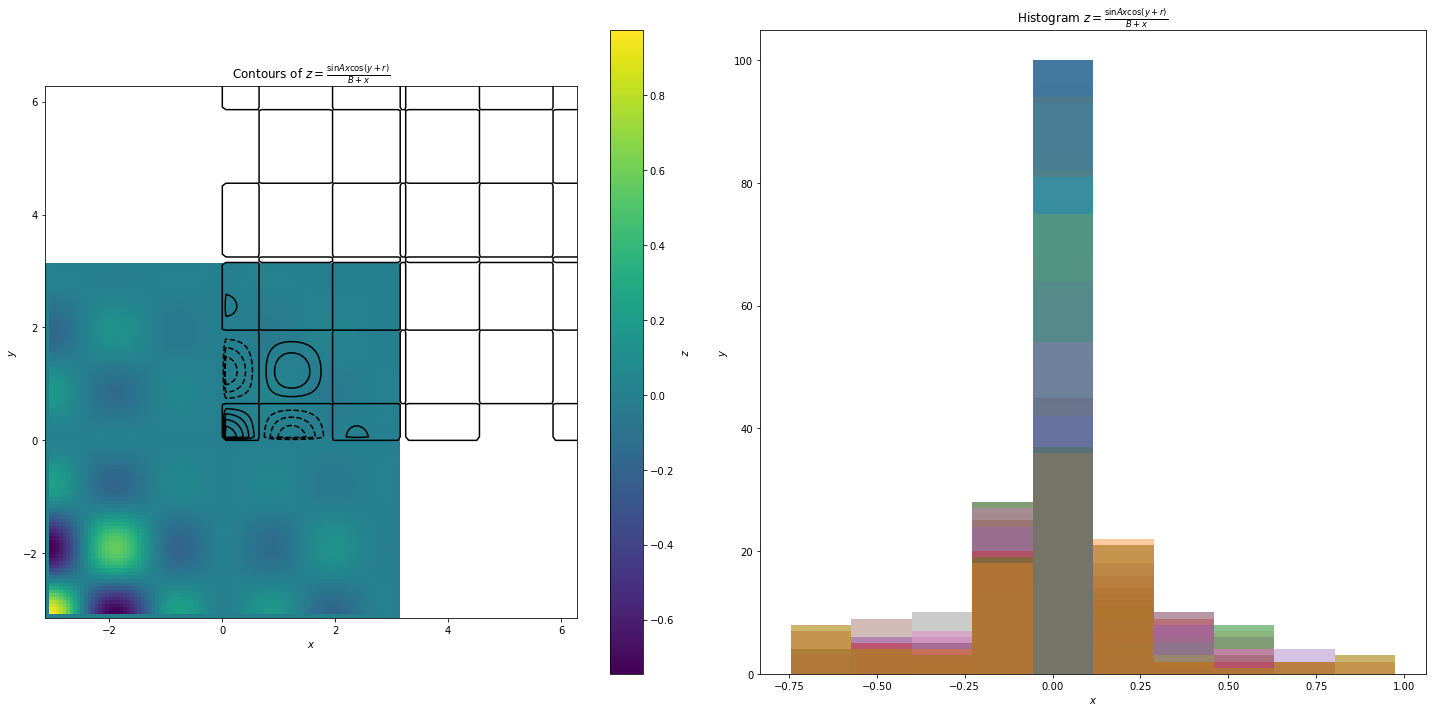

In [5]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)

im = plt.imshow(z, origin='lower', extent = [-np.pi, np.pi, -np.pi, np.pi])
collect = plt.contour(x, y, z ,10, colors ='k')
bar = plt.colorbar(im)
bar.set_label(r'$z$', rotation=270, labelpad=15)
plt.title('Contours of '+r'$z = \frac{\sin A x \cos(y+r)}{B + x} $')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.subplot(1,2,2)
plt.hist(z,histtype='stepfilled', alpha=0.4)
plt.title('Histogram '+r'$z = \frac{\sin A x \cos(y+r)}{B + x} $')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.tight_layout()
plt.show()

# Passing Parameters "N = 100,a = 0,b = 2*np.pi,A=1,B=1"

In [6]:
x,y,z = z_val(N = 100,a = 0,b = 2*np.pi,A=1,B=1)
print("Mean of the function 𝑧(𝑥,𝑦) : {:.4e}".format(np.mean(z)))

Mean of the function 𝑧(𝑥,𝑦) : 5.1334e-04


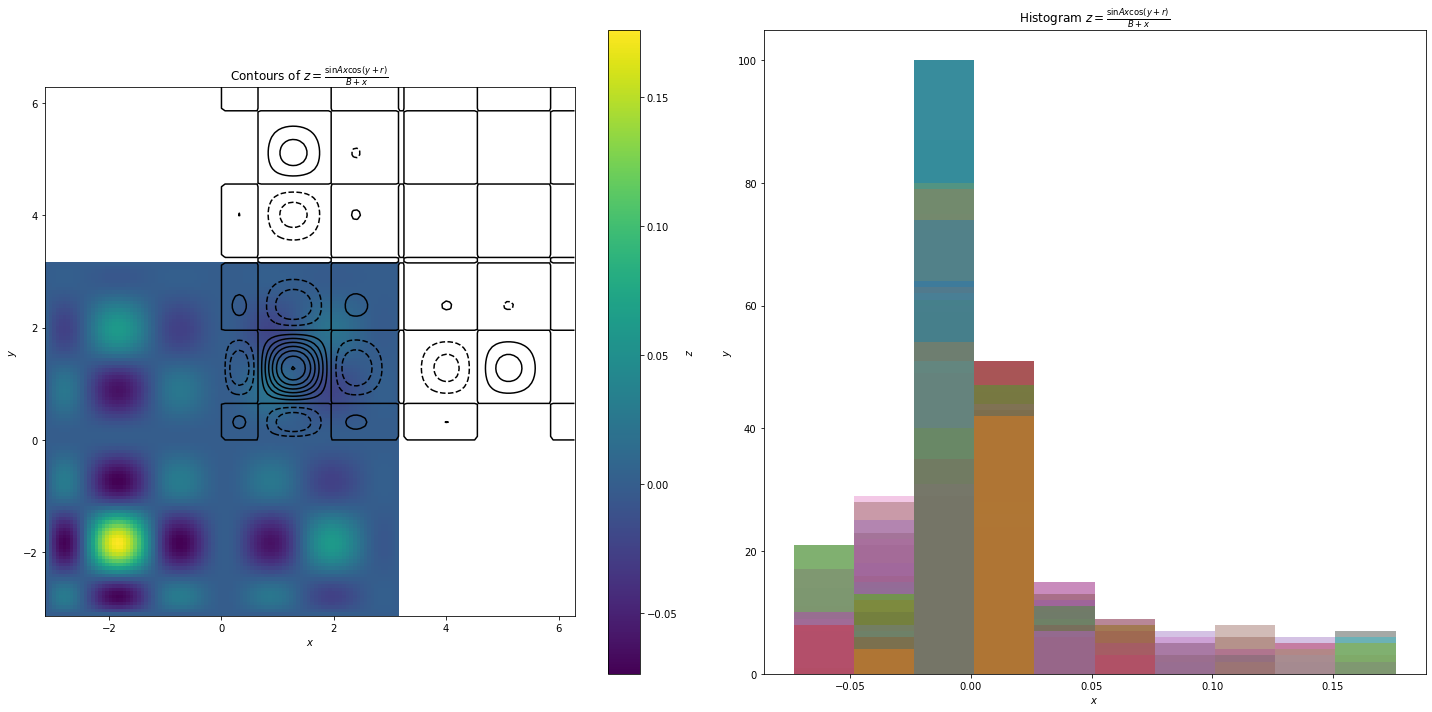

In [7]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)

im = plt.imshow(z, origin='lower', extent = [-np.pi, np.pi, -np.pi, np.pi])
cp = plt.contour(x, y, z ,10, colors ='k')
cb = plt.colorbar(im)
cb.set_label(r'$z$', rotation=270, labelpad=15)
plt.title('Contours of '+r'$z = \frac{\sin A x \cos(y+r)}{B + x} $')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.subplot(1,2,2)
plt.hist(z,histtype='stepfilled', alpha=0.4)
plt.title('Histogram '+r'$z = \frac{\sin A x \cos(y+r)}{B + x} $')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.tight_layout()
plt.show()

# Passing Parameters "N = 100,a = 0,b = 2*np.pi,A=1,B=2"

In [8]:
x,y,z = z_val(N = 100,a = 0,b = 2*np.pi,A=1,B=2)
print("Mean of the function 𝑧(𝑥,𝑦) : {:.4e}".format(np.mean(z)))

Mean of the function 𝑧(𝑥,𝑦) : 2.5929e-04


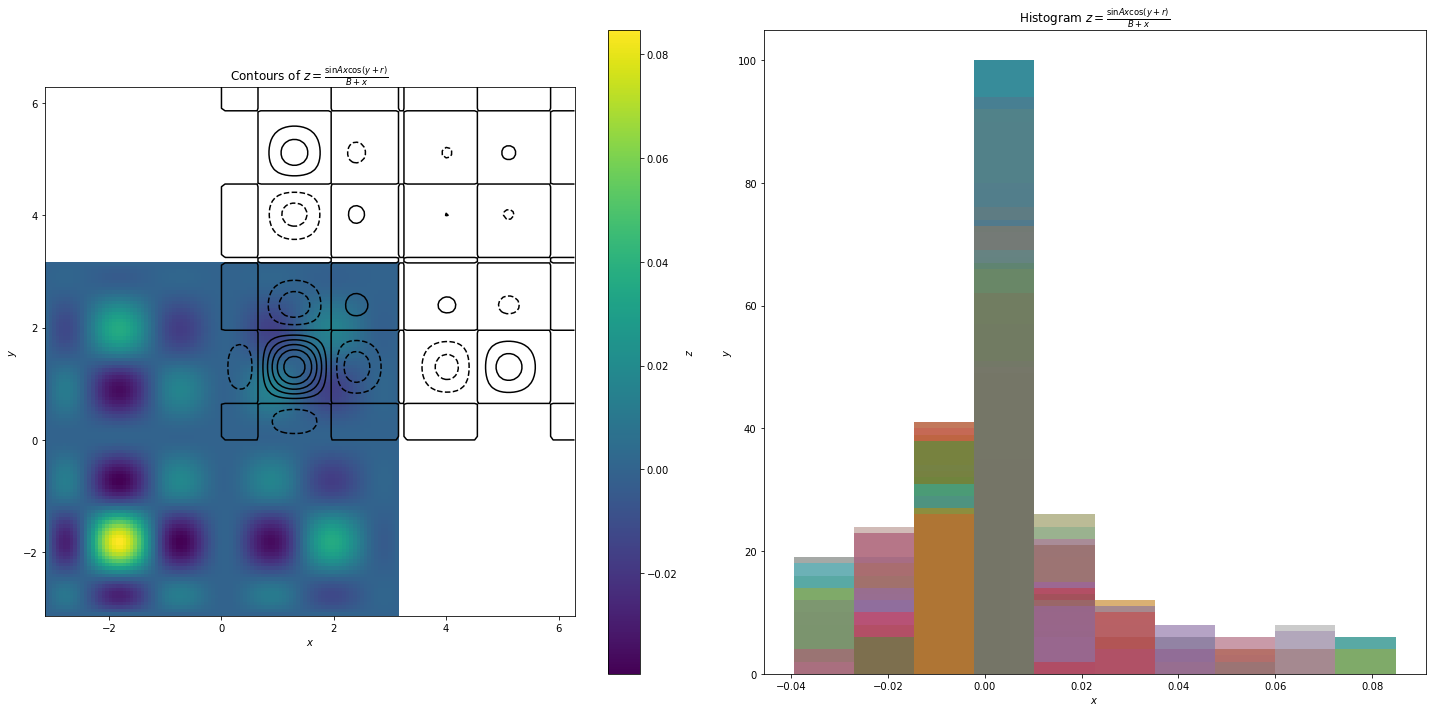

In [9]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)

im = plt.imshow(z, origin='lower', extent = [-np.pi, np.pi, -np.pi, np.pi])
cp = plt.contour(x, y, z ,10, colors ='k')
cb = plt.colorbar(im)
cb.set_label(r'$z$', rotation=270, labelpad=15)
plt.title('Contours of '+r'$z = \frac{\sin A x \cos(y+r)}{B + x} $')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.subplot(1,2,2)
plt.hist(z,histtype='stepfilled', alpha=0.4)
plt.title('Histogram '+r'$z = \frac{\sin A x \cos(y+r)}{B + x} $')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.tight_layout()
plt.show()

### Problem 3 (OPTIONAL, 10 marks): Using Runge-Kutta method to integrate an ODE

In Section 9 of the course we learned how to integrate Ordinary Differential Equations. Use the examples given in Sec09_ODEs_2021_Updated where we integrate a particle orbit around the Earth. This time,

* The initial conditions are $x_0 = -5\times 10^{8}$ m, $y_0 = 0$, $v_{x0} = 0$, $v_{y0} = -300$.

* The equation for the force is now slightly different:

$$F_g = -\frac{G m_1 (1 + \sqrt{r/r_0})}{r^2} m_2 \mathbf{\hat{r}}\;\;,$$

where $m_1$ is the mass of the Earth, and $r_0 = 4\times 10^8$ m. 

Integrate the orbit for $10^7$ seconds using the Runge-Kutta method with $10^5$ points. Plot the orbit. 



In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [11]:
def runge_Kutta (u, h, p):
    x , y , vx , vy = u
    G , m = p 
    r = np.array([x, y])
    d = np.sqrt(np.sum(r**2))
    ag = -G*m*r/d**3
    k1x = vx*h
    k1y = vy*h
    k1vx = ag[0]*h  
    k1vy = ag[1]*h
    x1 = x + k2x
    y1 = y + k2y
    vx1 = vx + k2vx
    vy1 = vy + k2vy
    res = (x1, vx1, y1, vy1)
    return res